In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
%matplotlib inline

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [24]:
def compare_app_csv(file_one, file_two, fig_name):    
    dflist = []
    df = pd.read_csv(file_one, index_col=None, header=0)
    df['environment'] = "chameleon 2 nodes"
    dflist.append(df)
    df = pd.read_csv(file_two, index_col=None, header=0)
    df['environment'] = "jetstream 2 nodes"
    dflist.append(df)
    df = pd.concat(dflist)
    df['startTime'] = pd.to_datetime(df['startTime'])
    df['endTime'] = pd.to_datetime(df['endTime'])
    df["duration_in_seconds"] = df["endTime"] - df["startTime"]
    df["duration_in_seconds"] = df['duration_in_seconds'] / np.timedelta64(1, 's')
    p = df.plot.bar(x='environment', y='duration_in_seconds', rot=360);
    fig = p.get_figure()
    fig.savefig(fig_name)

# Performance Comparison for creating word2vec model for 150 files

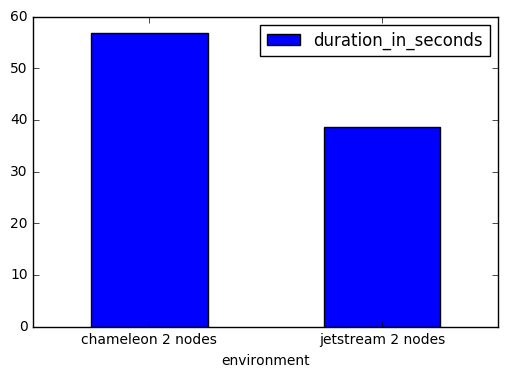

In [25]:
compare_app_csv("chameleon_2_node/app.csv", "jetstream_2_nodes/app.csv", "compare147.png")

##### Performance Comparison for creating word2vec model for 500 files

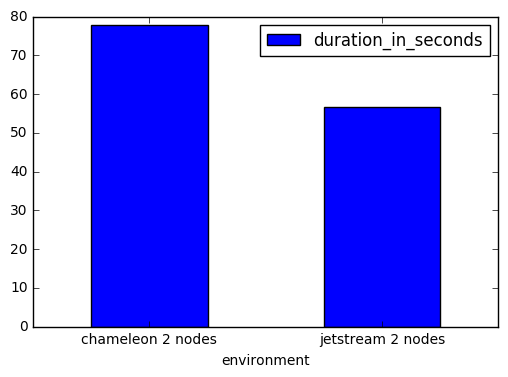

In [26]:
compare_app_csv("chameleon_2_node_500/app.csv", "jetstream_2_nodes_500/app.csv", "compare522.png")